# Advanced Numerical Analysis

## Exercise 36

*Consider the van der Pol equation* $\varepsilon y'' = (1 - y^2) y' - y$ *for* $\varepsilon = 0.03.$

$\textrm{(i)} \quad$ *Solve the initial value problem for the equivalent first order problem for* $(y, z)$ *where* $z := y'$ *with many different initial points, using a library routine suitable for stiff ODEs. Select from the resulting trajectories enough (but not too many) that their plots cover the box defined by* $|y| \le 2.5$ *and* $|z| \le 50$ *densely enough that no point has distance* $> 0.2$ *from a trajectory. In the drawing, use* $z$ *for the horizontal axis and* $y$ *for the vertical axis. Add arrows to each trajectory to indicate the direction of increasing time.*

To sufficiently cover the given box we add trajectories on its perimeter and in the vertical center line of the limit cycle with a little offset so that they do to not immediately switch to the other side. In order to not clutter the plot we restricted some of them in length and used broader spacing between them. One could use narrower spacing such that each point inside the box has a vertical distance less than 0.2 to a neighboring trajectory.

The trajectories and the limit cycle arrows are plotted in blue while the black arrows show the flow of the van der Pol equation.

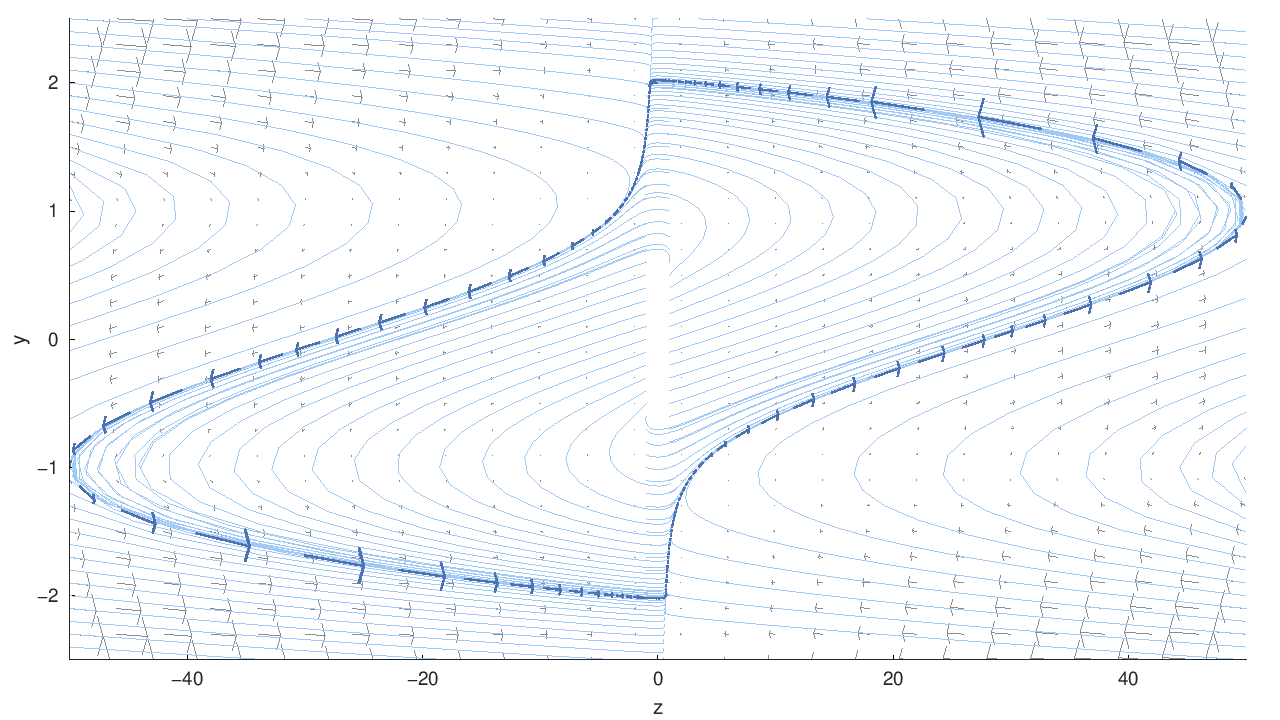

In [5]:
%plot -s 1280,720

z_lim = 50;
y_lim = 2.5;
eps = 0.03;
F = @(t, x) [((1 - x(2)^2) * x(1) - x(2)) / eps; x(1)]; % x(1) = z, x(2) = y

% colors
grey = [140, 140, 140] / 255;
blue = [76, 114, 176] / 255;
blue_light = [161, 201, 244] / 255;
orange = [221, 132, 82] / 255;
orange_light = [255, 180, 130] / 255;
green = [85, 168, 104] / 255;
green_light = [141, 229, 161] / 255;

hold on;

% vector field arrows
[Z, Y] = meshgrid(-z_lim : 2 * z_lim / 25 : z_lim, -y_lim : 2 * y_lim / 25 : y_lim);
quiver(Z, Y, ((1 .- Y.^2) .* Z .- Y) ./ eps, Z, "color", grey, "maxheadsize", 0.1)

% top left trajectories
for y0 = 1 : 0.1 : y_lim
    [_, sol] = ode23s(F, [0, y0], [-z_lim, y0]);
    % restricts length of trajectory to not clutter the bottom left part
    [val, ind] = min(sol(:,2) >= -1.1);
    sol = sol(1:ind,:);
    plot(sol(:,1), sol(:,2), "color", blue_light);
endfor

% bottom left trajectories
for y0 = -y_lim : 0.1 : -1
    [_, sol] = ode23s(F, [0, 0.1], [-z_lim, y0]);
    plot(sol(:,1), sol(:,2), "color", blue_light);
endfor

% top right trajectories
for y0 = 1 : 0.1 : y_lim
    [_, sol] = ode23s(F, [0, 0.1], [z_lim, y0]);
    plot(sol(:,1), sol(:,2), "color", blue_light);
endfor

% bottom right trajectories
for y0 = -y_lim : 0.1 : -1
    [_, sol] = ode23s(F, [0, y0^2], [z_lim, y0]);
    % restricts length of trajectory to not clutter the top right part
    [val, ind] = min(sol(:,2) <= 1.1);
    sol = sol(1:ind,:);
    plot(sol(:,1), sol(:,2), "color", blue_light);
endfor

% top and bottom trajectories
for z0 = -z_lim : 10 : 0
    [_, sol] = ode23s(F, [0, 0.1], [z0, y_lim]);
    plot(sol(:,1), sol(:,2), "color", blue_light);
    
    [_, sol] = ode23s(F, [0, 0.1], [-z0, y_lim]);
    plot(sol(:,1), sol(:,2), "color", blue_light);
endfor

% central trajectories
for y0 = -2 : 0.1 : 2
    % right offset
    [_, sol] = ode23s(F, [0, 0.3], [1, y0]);
    plot(sol(:,1), sol(:,2), "color", blue_light);
    
    % left offset
    [_, sol] = ode23s(F, [0, 0.3], [-1, y0]);
    plot(sol(:,1), sol(:,2), "color", blue_light);
endfor

% limit cycle
[_, sol] = ode23s(F, [0, 4], [0, 2]);
quiver(sol(:,1), sol(:,2), gradient(sol(:,1)), gradient(sol(:,2)), "color", blue, "maxheadsize", 0.05, "linewidth", 5);

% axis settings
axis([-z_lim, z_lim, -y_lim, y_lim]);
xlabel("z");
ylabel("y");

$$ $$
$\textrm{(ii)} \quad$ *Find another equivalent first order problem for the Liénhard coordinates* $(y, u)$ *where* $u := \varepsilon y' + \frac{y^3}{3} - y.$ *Do the same as in* $\textrm{(i)}$ *for the box defined by* $|y| \le 2.5$ *and* $|u| \le 1.5.$ *In the drawing, use* $u$ *for the horizontal axis and* $y$ *for the vertical axis.*

To cover the given box we added trajectories along its top and bottom perimeter and along the offset central diagonal.

The trajectories and the limit cycle arrows are plotted in orang while the black arrows show the flow of the van der Pol equation.

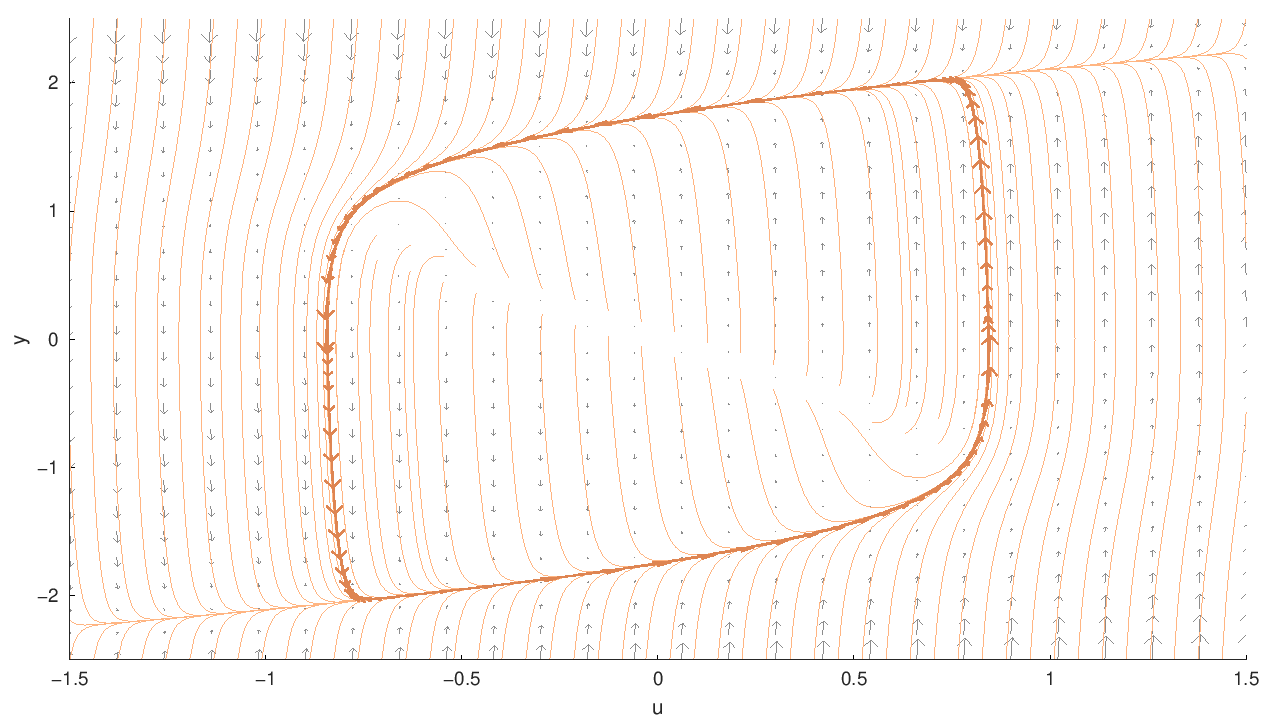

In [6]:
u_lim = 1.5;
y_lim = 2.5;
eps = 0.03;
G = @(t, x) [-x(2); (x(1) + x(2) - x(2)^3 / 3) / eps]; % Liénhard coordinates u = x(1), y = x(2)

hold on;

% vector field arrows
[U, Y] = meshgrid(-u_lim : 2 * u_lim / 25 : u_lim, -y_lim : 2 * y_lim / 25 : y_lim);
quiver(U, Y, -Y, (U .+ Y .- Y.^3 ./ 3) ./ eps, "color", grey)

% outer trajectories
for u0 = linspace(-u_lim, u_lim, 50)
    % top
    [_, sol] = ode23s(G, [0, 1], [u0, y_lim]);
    plot(sol(:,1), sol(:,2), "color", orange_light);
    
    % bottom
    [_, sol] = ode23s(G, [0, 1], [u0, -y_lim]);
    plot(sol(:,1), sol(:,2), "color", orange_light);
endfor

% inner trajectories
for u0 = linspace(-0.8, 0.8, 20)
    % top offset
    [_, sol] = ode23s(G, [0, 1], [u0, -u0 + 0.1]);
    plot(sol(:,1), sol(:,2), "color", orange_light);
    
    % bottom offset
    [_, sol] = ode23s(G, [0, 1], [u0, -u0 - 0.1]);
    plot(sol(:,1), sol(:,2), "color", orange_light);
endfor

% limit cycle
[_, sol] = ode23s(G, [0, 2.5], [0.75, 2]);
quiver(sol(:,1), sol(:,2), gradient(sol(:,1)), gradient(sol(:,2)), "color", orange, "maxheadsize", 0.1, "linewidth", 5);

% axis settings
axis([-u_lim, u_lim, -y_lim, y_lim]);
xlabel("u");
ylabel("y");

$$ $$
$\textrm{(iii)} \quad$ *What is the advantage of the Liénhard coordinates when one considers the limit* $\varepsilon \rightarrow 0$*? Draw figures for several interesting smaller values of* $\varepsilon$ *with the same starting points as used in* $\textrm{(ii)},$ *and interpret the resulting qualitative behavior as* $\varepsilon \rightarrow 0.$

In [42]:
function plotClassic(eps, n = 5, T = 1, color = "k", linewidth = 4)
    z_lim = 50;
    y_lim = 2.5;
    F = @(t, x) [((1 - x(2)^2) * x(1) - x(2)) / eps; x(1)];

    hold on;
    for y0 = linspace(-y_lim, y_lim, n)
        [_, sol] = ode23s(F, [0, T], [0, y0]);
        plot(sol(:,1), sol(:,2), "color", color, "linewidth", linewidth);
    endfor
endfunction


function plotLienhard(eps, n = 5, T = 1, color = "k", linewidth = 5)
    u_lim = 1.5;
    y_lim = 2.5;
    F = @(t, x) [-x(2); (x(1) + x(2) - x(2)^3 / 3) / eps];

    hold on;
    for u0 = linspace(-u_lim, u_lim, n)
        % top perimeter
        [_, sol] = ode23s(F, [0, T], [u0, y_lim]);
        plot(sol(:,1), sol(:,2), "color", color, "linewidth", linewidth);

        % bottom perimeter
        [_, sol] = ode23s(F, [0, T], [u0, -y_lim]);
        plot(sol(:,1), sol(:,2), "color", color, "linewidth", linewidth);
    endfor
endfunction

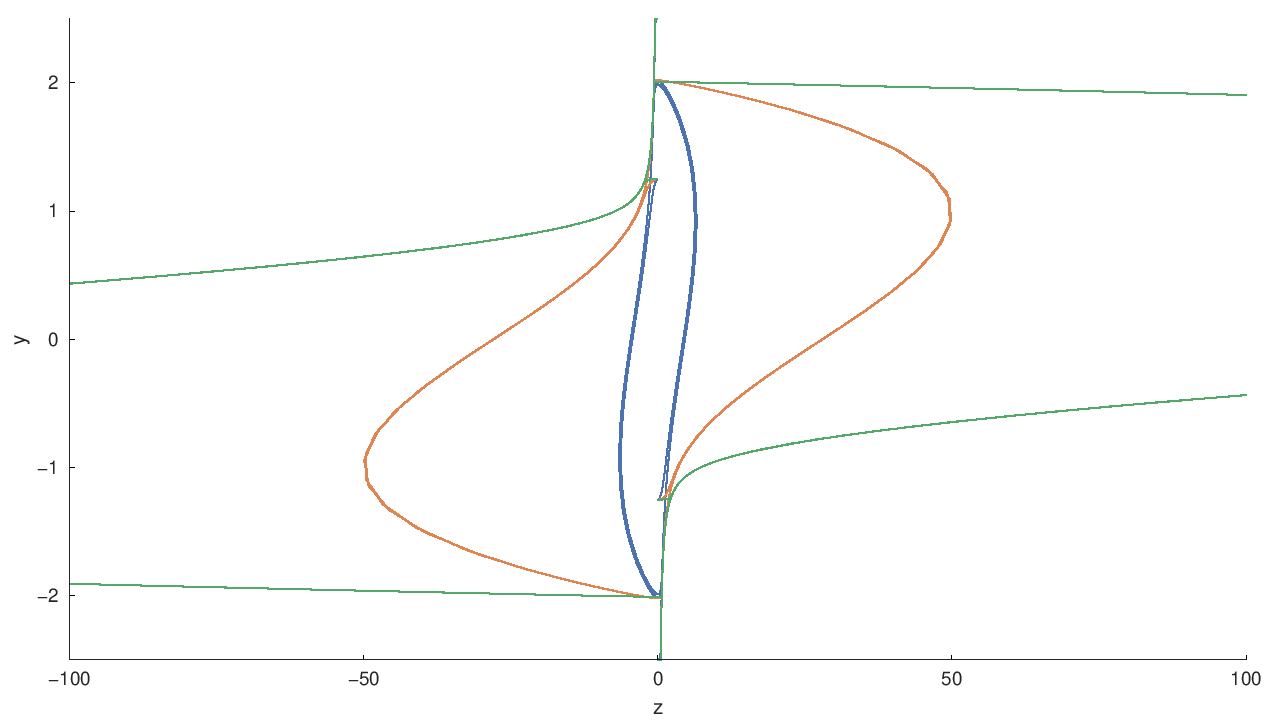

In [43]:
hold on;
plotClassic(0.3, 5, 4, blue);
plotClassic(0.03, 5, 4, orange);
plotClassic(0.003, 5, 4, green);
axis([-2*z_lim, 2*z_lim, -y_lim, y_lim]);
xlabel("z");
ylabel("y");

In the normal $(z, y)$-coordinates as $\varepsilon$ gets smaller, the peaks in the $z$-direction of the limit cycle get more exaggerated and grow to $\pm \infty$ as $\varepsilon \rightarrow 0.$

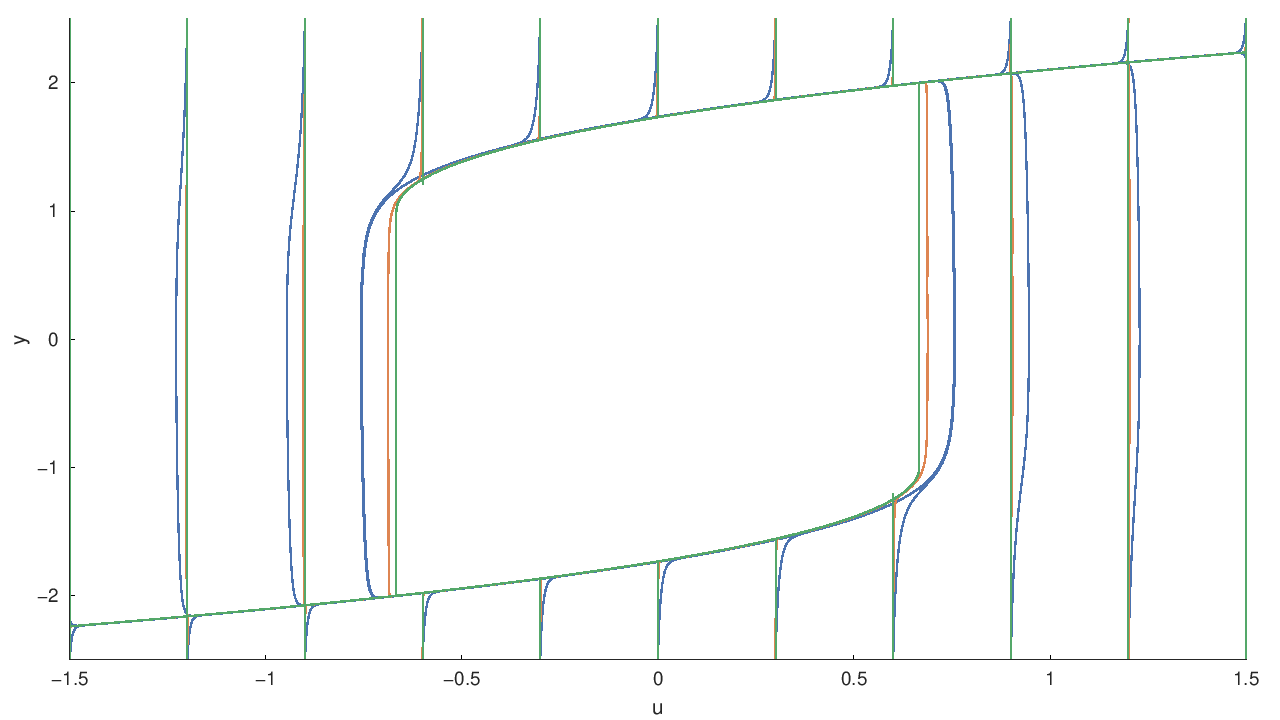

In [48]:
hold on;
plotLienhard(1e-2, 11, 1, blue);
plotLienhard(1e-3, 11, 1, orange);
plotLienhard(1e-8, 11, 1, green);
axis([-u_lim, u_lim, -y_lim, y_lim]);
xlabel("u");
ylabel("y");

In contrast to the standrad coordinates for the Liénhard coordinates $(u, y)$ as $\varepsilon \rightarrow 0$ the limit cycle shrinks and approaches a limiting curve. For very small $\varepsilon$ numerical inaccuracies start to show up, notice the green protrusion inside the limit cycle.